## EX 07

#### 1. 📚 Импорты

In [510]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### 2. 📥 Подключение к БД и чтение данных

In [511]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn, parse_dates=['timestamp'])
conn.close()

#### 3. 🕒 Добавляем день недели и час

In [512]:
df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

#### 4. 📊 Тепловая карта коммитов по дням недели

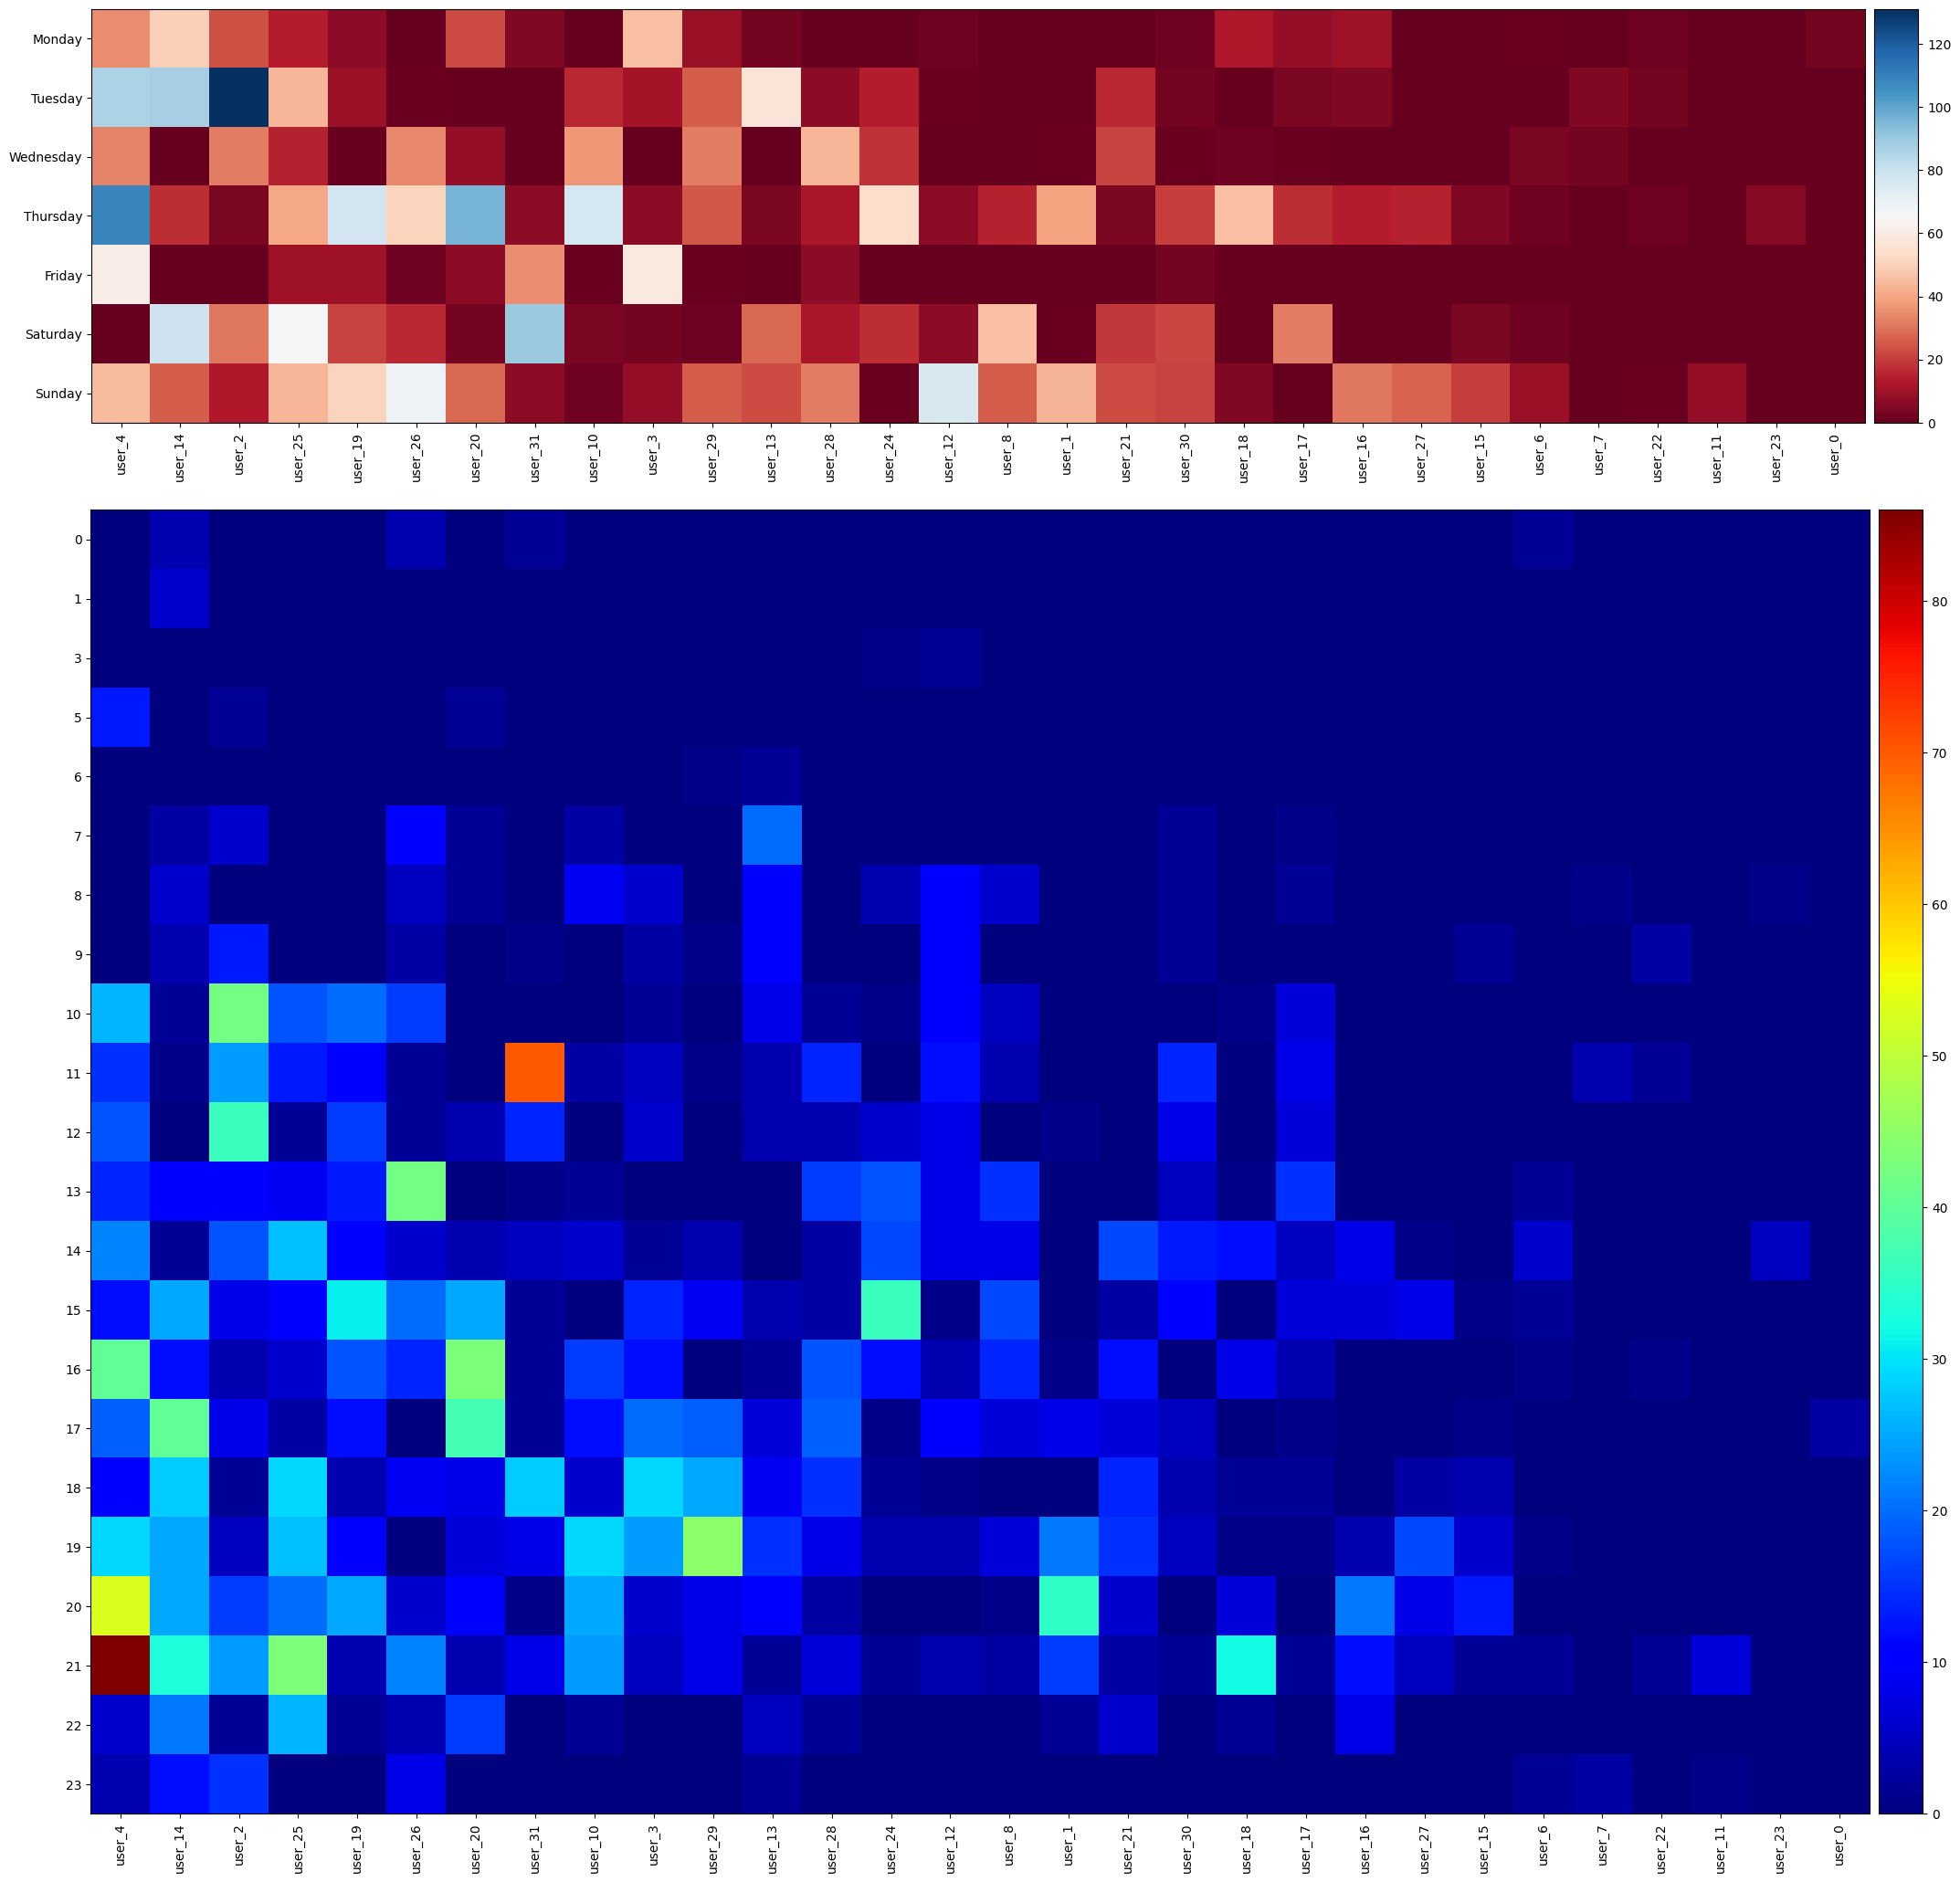

In [513]:
# Упорядочим дни недели
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Группировка по дням недели
week_heatmap = df.groupby(['weekday', 'uid']).size().unstack(fill_value=0).reindex(weekdays_order)
week_heatmap = week_heatmap.loc[:, week_heatmap.sum().sort_values(ascending=False).index]

# Группировка по часам
hour_heatmap = df.groupby(['hour', 'uid']).size().unstack(fill_value=0).sort_index()
hour_heatmap = hour_heatmap.loc[:, hour_heatmap.sum().sort_values(ascending=False).index]

# # Подсчёт размеров
num_weekdays = len(week_heatmap.index)
num_users = len(week_heatmap.columns)
num_hours = len(hour_heatmap.index)

# Построение графиков
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 14), constrained_layout=False)

# cell_size = 0.5  # размер ячейки в дюймах

# fig_height = num_hours * cell_size
# fig_width = num_users * cell_size

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height * 2))


# ==== Верхняя тепловая карта: дни недели ====
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="2.5%", pad=0.1)
im1 = ax1.imshow(week_heatmap.values, aspect='equal', cmap='RdBu')  # синие — большие, красные — маленькие
ax1.set_yticks(range(num_weekdays))
ax1.set_yticklabels(week_heatmap.index)
ax1.set_xticks(range(num_users))
ax1.set_xticklabels(week_heatmap.columns, rotation=90)
plt.colorbar(im1, cax=cax1)

# ==== Нижняя тепловая карта: часы ====
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="2.5%", pad=0.1)
im2 = ax2.imshow(hour_heatmap.values, aspect='equal', cmap='jet')
ax2.set_yticks(range(num_hours))
ax2.set_yticklabels(hour_heatmap.index)
ax2.set_xticks(range(num_users))
ax2.set_xticklabels(hour_heatmap.columns, rotation=90)
ax1.set_position([0, 1, 1, 0.9])  # верхний график
ax2.set_position([-0.009, 0.2, 1.02, 1.02])   # нижний график
plt.colorbar(im2, cax=cax2)

plt.show()

#### “Which user has the most commits on Tue?”

## The answer: user_2.

#### “Which user has the most commits on Thu?”

## The answer: user_4.

#### “On which weekday do the users not like making a lot of commits?”

##  The answer: Friday.

#### “Which user at which hour made the largest number of commits?”

##  The answer, for example: user_4, 21